<a href="https://colab.research.google.com/github/shams-mehdi/information_imbalance/blob/main/Information_imbalance_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt

dat2 = np.load('/content/aladip_red.npy')

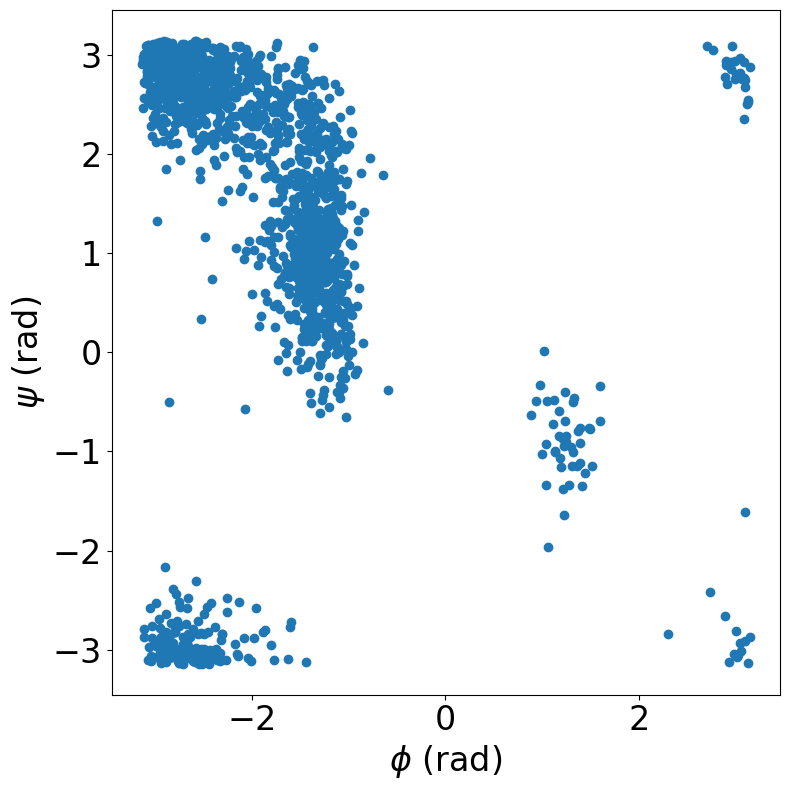

In [33]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(dat2[:,0],dat2[:,1],'o')
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xlabel(r'$\phi$ (rad)', fontsize = 24)
ax.set_ylabel(r'$\psi$ (rad)', fontsize = 24)

fig.tight_layout()

In [34]:
from tqdm import tqdm
import copy
import scipy.stats as sst

def diff(angle_1, angle_2):
  res = (angle_1 - angle_2)%360
  if res < 180:
    return res
  else:
    return (360-res)

def dist_rank(data, ind, angles_bool):
  dat3 = np.zeros((dat2.shape[0],dat2.shape[0]))
  for i in tqdm(range(dat2.shape[0]), desc = 'dat3'):
    data_sub = dat2[:, ind]

    if angles_bool ==True:
      kale = np.zeros((data_sub.shape[0], data_sub.shape[1]))
      for j in range(kale.shape[0]):
       for k in range(kale.shape[1]):
        kale[j,k] = diff(data_sub[j,k], data_sub[i,k])

      dat3[i,:] = np.linalg.norm(kale, axis =1)
    else:
      dat3[i,:] = np.linalg.norm(data_sub - data_sub[i,:], axis = 1)

  dat4 = np.zeros((dat2.shape[0],dat2.shape[0]), dtype=int)

  for i in tqdm(range(dat2.shape[0]), desc = 'dat4'):
    dat4[i,:] = np.argsort(dat3[i,:])

  dat5 = np.zeros((dat2.shape[0],dat2.shape[0]), dtype=int)

  for i in tqdm(range(dat5.shape[0]), desc = 'dat5'):
    for j in range(dat5.shape[1]):
      tmp = copy.deepcopy(dat4[i,j])
      dat5[i,tmp] = j
  print(i)
  x_no_diag = np.ndarray.flatten(dat5)
  x_no_diag = np.delete(x_no_diag, range(0, len(x_no_diag), len(dat5) + 1), 0)
  return x_no_diag



In [39]:
d_rank1 = dist_rank(dat2, np.array([0,1,2,3]), False)
d_rank2 = dist_rank(dat2, np.array([0,1]), False)
d_rank3 = dist_rank(dat2, np.array([0,2]), False)
d_rank4 = dist_rank(dat2, np.array([0]), False)
d_rank5 = dist_rank(dat2, np.array([3]), False)

dat5: 100%|██████████| 1601/1601 [00:05<00:00, 274.81it/s]


1600


dat5: 100%|██████████| 1601/1601 [00:07<00:00, 202.66it/s]


1600


dat5: 100%|██████████| 1601/1601 [00:05<00:00, 269.45it/s]


1600


dat5: 100%|██████████| 1601/1601 [00:07<00:00, 202.02it/s]


1600


dat5: 100%|██████████| 1601/1601 [00:05<00:00, 270.89it/s]

1600


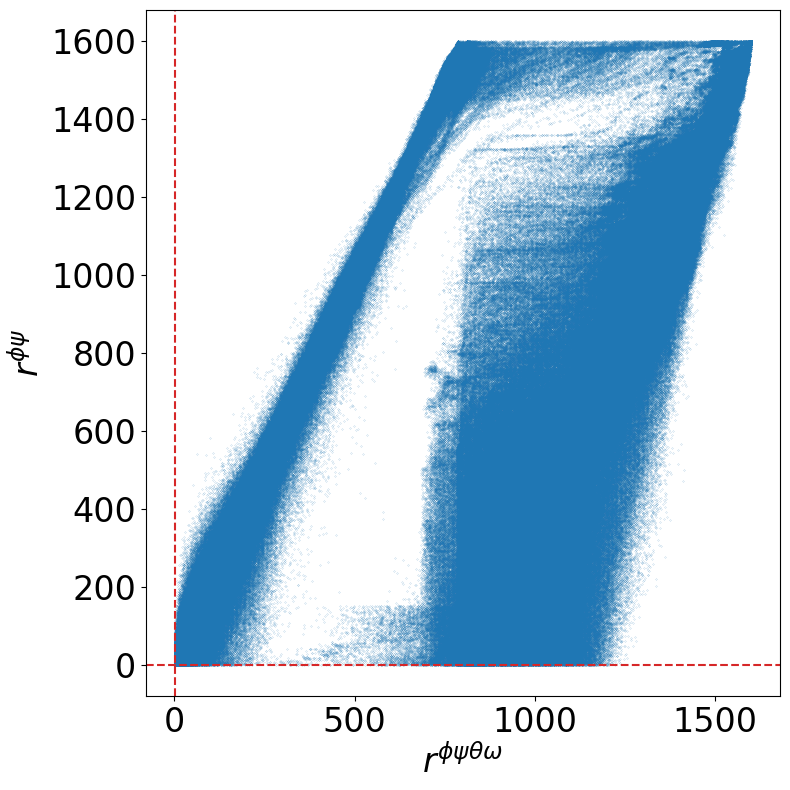

In [49]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(d_rank1, d_rank2, 'o', markersize = 0.1, color = 'tab:blue')
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xlabel(r'$r^{\phi \psi \theta \omega}$', fontsize = 24)
ax.set_ylabel(r'$r^{\phi \psi}$', fontsize = 24)
ax.axvline(x = 1, color = 'tab:red', linestyle = '--')
ax.axhline(y = 1, color = 'tab:red', linestyle = '--')
fig.tight_layout()

In [50]:
d_rank1_cond_rank_2 = d_rank1[np.where(d_rank2 <= 1)[0]]
d_rank1_cond_rank_3 = d_rank1[np.where(d_rank3 <= 1)[0]]
d_rank1_cond_rank_4 = d_rank1[np.where(d_rank4 <= 1)[0]]
d_rank1_cond_rank_5 = d_rank1[np.where(d_rank5 <= 1)[0]]

d_rank2_cond_rank_1 = d_rank2[np.where(d_rank1 <= 1)[0]]
d_rank3_cond_rank_1 = d_rank3[np.where(d_rank1 <= 1)[0]]
d_rank4_cond_rank_1 = d_rank4[np.where(d_rank1 <= 1)[0]]
d_rank5_cond_rank_1 = d_rank5[np.where(d_rank1 <= 1)[0]]

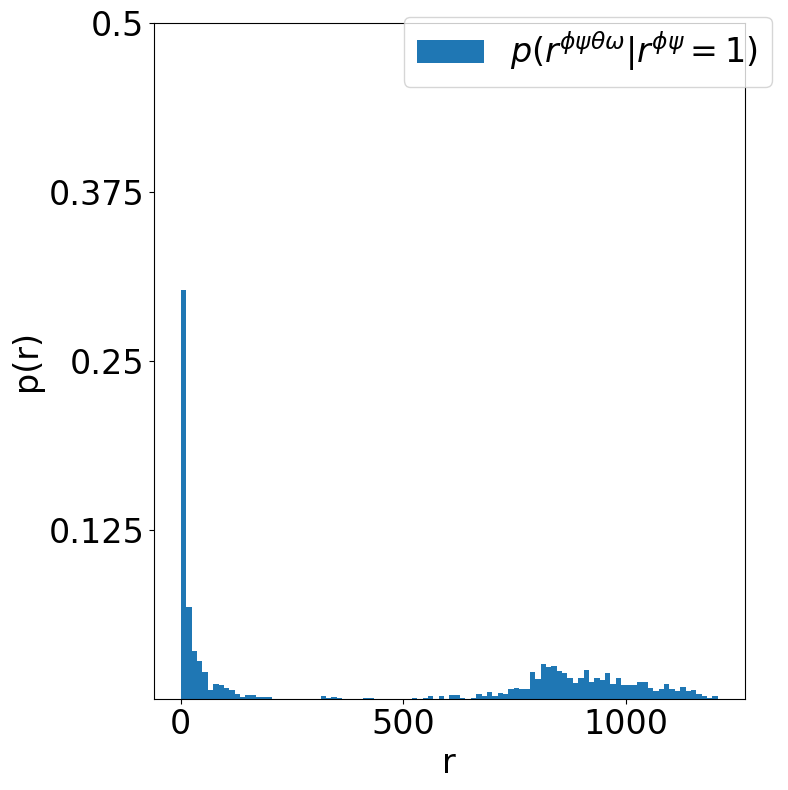

In [66]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize = (8,8))

au = ax.hist(d_rank1_cond_rank_2, bins = 100, label = r'$p(r^{\phi \psi \theta \omega}|r^{\phi \psi }=1)}$')
ax.set_xlabel('r', fontsize = 24)
ax.set_ylabel('p(r)', fontsize = 24)
ax.set_yticks(np.arange(200,1000,200))
ax.set_yticklabels(np.arange(200,1000,200)/1600)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
fig.legend(fontsize = 24)
fig.tight_layout()

In [72]:
def expectation(du):
  du_x = []
  for i in range(1,du[1].shape[0]):
    du_x.append((du[1][i] + du[1][i-1])/2)

  du_x = np.array(du_x)
  return 2*np.sum(du_x*du[0])/(np.sum(du[0])*np.max(du[1]))

a1 = ax.hist(d_rank1_cond_rank_2, bins = 100)
a2 = ax.hist(d_rank1_cond_rank_3, bins = 100)
a3 = ax.hist(d_rank1_cond_rank_4, bins = 100)
a4 = ax.hist(d_rank1_cond_rank_5, bins = 100)
b1 = ax.hist(d_rank2_cond_rank_1, bins = 100)
b2 = ax.hist(d_rank3_cond_rank_1, bins = 100)
b3 = ax.hist(d_rank4_cond_rank_1, bins = 100)
b4 = ax.hist(d_rank5_cond_rank_1, bins = 100)



aa1 = (expectation(a1))
aa2 = (expectation(a2))
aa3 = (expectation(a3))
aa4 = (expectation(a4))
bb1 = (expectation(b1))
bb2 = (expectation(b2))
bb3 = (expectation(b3))
bb4 = (expectation(b4))

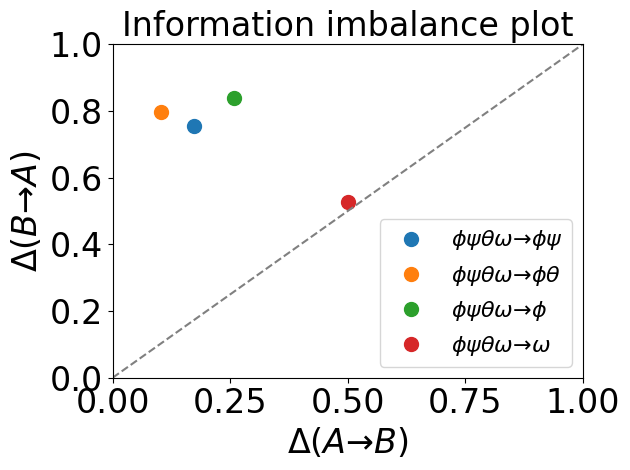

In [88]:
fig, ax = plt.subplots()

ax.plot(bb1,aa1,'o', markersize = 10, label = r'$\phi \psi \theta \omega \to \phi \psi $')
ax.plot(bb2,aa2,'o', markersize = 10, label = r'$\phi \psi \theta \omega \to \phi \theta $')
ax.plot(bb3,aa3,'o', markersize = 10, label = r'$\phi \psi \theta \omega \to \phi  $')
ax.plot(bb4,aa4,'o', markersize = 10, label = r'$\phi \psi \theta \omega \to \omega$')

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel(r'$\Delta (A \to B)$', fontsize = 24)
ax.set_ylabel(r'$\Delta (B \to A)$', fontsize = 24)
ax.legend(fontsize = 16)
ax.set_title('Information imbalance plot', fontsize = 24)

xxx = np.linspace(0,1,10)
yyy = np.linspace(0,1,10)

ax.plot(xxx,yyy, color = 'gray', linestyle = '--')
fig.tight_layout()